# **Actividad 4**
## *Estructurando un proyecto de DS*

### 1. Abstracto con motivación y audiencia.

Se estan presentando fallas por la implementación de energías renovables en Colombia, y el gobierno a solicitado gestionar el asunto a las distribuidoras de energía, para ello se deberan realizar controles sobre el consumo para evitar las fallas en los consumos de energéticos.

Una de las principales fallas presentadas es el continuo desfasamiento en la frecuencia debido a los cambios constantes en el consumo que hacen que la energía generada por grandes distribuidores energéticos ocasione inconvenientes en los sectores residenciales.

El objetivo es con los controles llegar a acuerdos y leyes que permitan un paso a una transición energética mas estable que de paso a la inclusión de las energías renovables de una mejor manera sin inconvenientes.

Se encuentra un dataset de pronósticos de consumo energético ofrecido por XM, este dataset nos permitira darnos una idea del consumo, tener presente que al ser un pronóstico contiene datos aproximados de los reales y en gran medida mayores, debido a que lo normal en un pronóstico es que sea mayor a la medida debido a que es indispensable que no se presente escacez en la entrega de energía.

### 2. Preguntas/Hipotésis que queremos resolver mediante el análisis de datos

La busqueda de una solución se dará respecto a como se registren los consumos y en la busqueda de las franjas donde se presentan mas inconvenientes en la energía.

##### 1)¿En que horario se presenta el mayor consumo de energía?
##### 2)¿Que sector es el que mas presenta consumo de energia?
##### 3)¿Son diferentes los horarios de consumo de una gran Región a un pequeña?

### 3. Análisis exploratorio de datos (EDA)

In [1]:
# Se importan librerías de trabajo

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# importando el archivo csv 
url="https://raw.githubusercontent.com/JSEB99/bootcamp_DS_BIT/main/pronosticos_consumo_semanal.csv"
dataset=pd.read_csv(url,sep=',')
# Conozco que campos contiene el dataframe
dataset.head(1)

,Operadores_de_red,hora,potencia,lunes,martes,miercoles,jueves,viernes,sabado,domingo
0,MC-Antioquia,1,EN,883.0,923.0,924.0,921.0,938.0,956.0,907.0


In [3]:
# Se revisa el contenido del dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Operadores_de_red  2952 non-null   object 
 1   hora               2952 non-null   int64  
 2   potencia           2952 non-null   object 
 3   lunes              2952 non-null   float64
 4   martes             2952 non-null   float64
 5   miercoles          2952 non-null   float64
 6   jueves             2952 non-null   float64
 7   viernes            2952 non-null   float64
 8   sabado             2952 non-null   float64
 9   domingo            2952 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 230.8+ KB


In [6]:
# se revisan valores nulos en el dataset
dataset.isnull().sum()

Operadores_de_red    0
hora                 0
potencia             0
lunes                0
martes               0
miercoles            0
jueves               0
viernes              0
sabado               0
domingo              0
dtype: int64

Se observa que el dataset maneja columnas respecto a los distribuidores de red en los diferentes sectores, hora, medida y dias de la semana.

No se observan valores nulos

De acuerdo a la información de los campos no se evidencian alteraciones en los datos por lo cual el dataset esta listo para trabajarse

In [7]:
#Visualizo que operadores de red existen con su longitud
operators_list=dataset['Operadores_de_red'].unique()
print(operators_list,len(operators_list))

['MC-Antioquia' 'MC-Arauca' 'MC-Atlantico' 'MC-BajoPutumayo' 'MC-Bolivar'
 'MC-Boyaca' 'MC-Caldas' 'MC-Cali' 'MC-Caqueta' 'MC-Cartago' 'MC-Casanare'
 'MC-Cauca' 'MC-Celsia' 'MC-Cerromatoso' 'MC-Cesar' 'MC-Choco'
 'MC-CiraInfanta' 'MC-Codensa' 'MC-CordobaSucre' 'MC-Drummond'
 'MC-DrummondLoma' 'MC-Emec' 'MC-GM' 'MC-Guaviare' 'MC-Huila'
 'MC-Intercor' 'MC-Meta' 'MC-Nariño' 'MC-NorSantander' 'MC-Oxy'
 'MC-Pereira' 'MC-Planeta' 'MC-PSTN' 'MC-Putumayo' 'MC-Quindio'
 'MC-Rubiales' 'MC-SanFernando' 'MC-Santander' 'MC-Tolima'
 'MC-TubosCaribe' 'MC-Tulua'] 41


### CONTEXTUALIZACIÓN
Antes de resolver las préguntas, el consumo energético ideal sería uno donde no se presenten cambios tan grandes, donde las distribuidores de energía puedan controlar de mejor manera su suministro sin presentarse cambios que puedan desbalancear la red energética nacional. 
En la Teoría la curva de consumo actual se le llama "curva de pato", la cual tiene la siguiente forma:

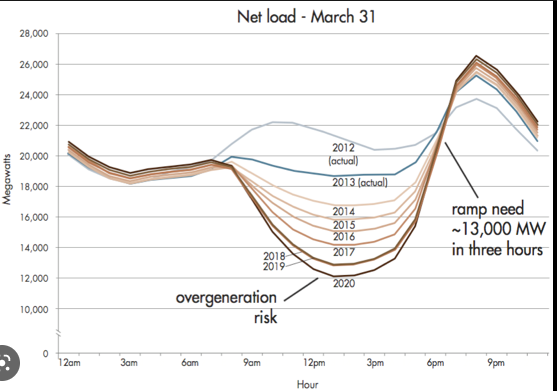

De acuerdo a lo anterior primero se evidenciarán esta curva con un centro de gran consumo, que es la distribuidora de Codensa, que suministra en algunos municipios de Boyacá (8), Cundinamarca, uno del Tolima, uno de Caldas, uno del Meta y Bogotá. La cual es la de mayor operatividad en Colombia.

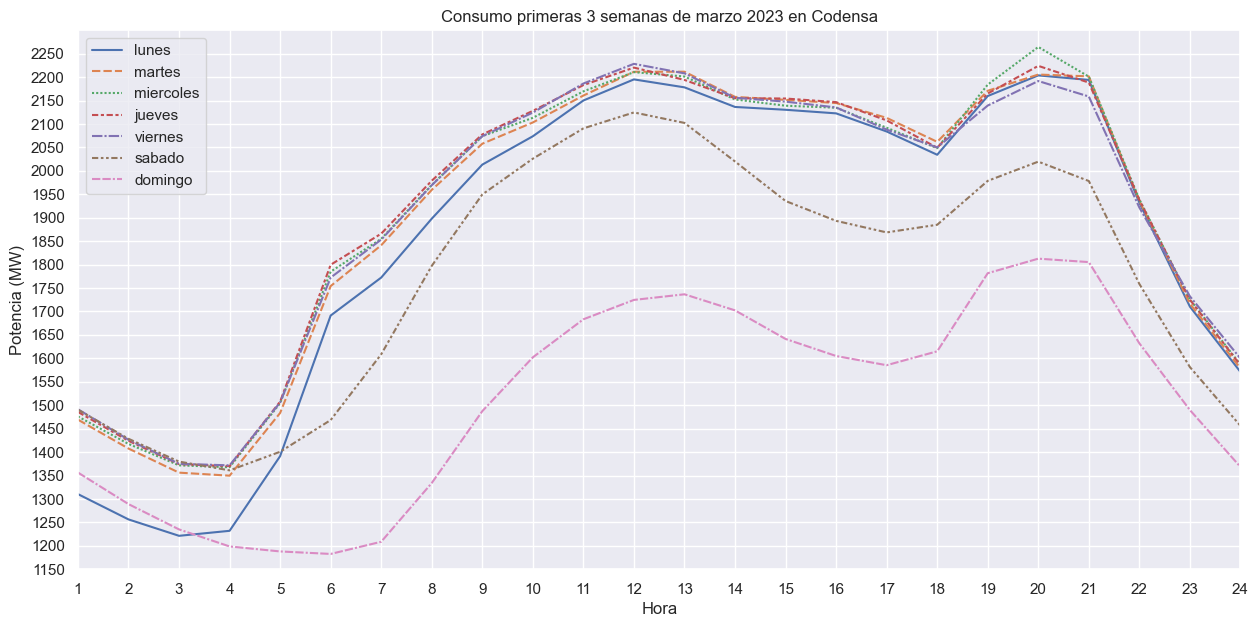

In [8]:
# Obtengo los consumos de Codensa
consumo_codensa = dataset[dataset['Operadores_de_red']=='MC-Codensa']
# elimino la columna de Operadores de red
consumo_codensa = consumo_codensa.drop('Operadores_de_red',axis='columns')
# averiguo el consumo según las 3 semanas por hora del día
promedio_consumo_codensa = consumo_codensa.groupby('hora').mean(numeric_only=True)
# Graficando la curva según los días y las horas de la semana promedio, según las 3 primeras semanas de Marzo
sns.set(rc={"figure.figsize":(15, 7)})
ax3=sns.lineplot(data=promedio_consumo_codensa[['lunes','martes','miercoles','jueves','viernes','sabado','domingo']])
ax3.set_xlim(promedio_consumo_codensa.index[0], promedio_consumo_codensa.index[-1])
ax3.set_ylim(1150,2300)
ax3.set_xlabel('Hora')  
ax3.set_ylabel('Potencia (MW)') 
ax3.set_title('Consumo primeras 3 semanas de marzo 2023 en Codensa')
ax3.set_xticks(np.arange(1, len(promedio_consumo_codensa.index)+1, 1))
ax3.set_yticks(np.arange(1150, max(promedio_consumo_codensa['miercoles']), 50))
sns.move_legend(ax3,"upper left")

#### Observaciones
De lo anterior no es tan notorio la llamada curva de pato, sin embargo sigue la misma tendencia. Mencionar que dependiendo del día se tienen más consumos que otros como se puede evidenciar que los fines de semana que es donde las personas abandonan las principales Ciudades en su mayoria y no se tienen jornadas laborales que requieran grandes usos energéticos, se presenta un declive en el consumo energético. Ademas que en los días habiles de la semana no se presentan cambios tan notorios en la curva, en el rango de 10 a 21 horas, concluyendose que en ese rango es donde las personas estan más activas digitalmente como laboralmente. 

In [9]:
# Elimino campo innecesario
dataset_sin_potencia=dataset.drop('potencia',axis='columns')
# promedio segun hora
dataset_horario = dataset.groupby(['Operadores_de_red','hora']).mean(numeric_only=True)
# agrego columna de promedio en semana segun hora
dataset_horario['promedio_semanal_por_dia']=dataset_horario.mean(axis=1)
# averiguo hora maxima de consumo según consumo
dataset_hora_max = dataset_horario.reset_index()
dataset_hora_max_2 = dataset_hora_max[['Operadores_de_red','promedio_semanal_por_dia']].groupby('Operadores_de_red').max()
# intersección entre los dataset para averiguar la hora en que se produjo el consumo máximo
dataset_max = pd.merge(dataset_hora_max,dataset_hora_max_2,how='inner',on = 'promedio_semanal_por_dia')
# agrego columna para gráficar resultados
dataset_max['Operador/Hora'] = dataset_max['Operadores_de_red']+'/'+dataset_max['hora'].astype(str)
dataset_max

,Operadores_de_red,hora,lunes,martes,miercoles,jueves,viernes,sabado,domingo,promedio_semanal_por_dia,Operador/Hora
0,MC-Antioquia,20,1529.333333,1534.666667,1525.000000,1529.000000,1525.666667,1413.333333,1280.333333,1476.761905,MC-Antioquia/20
1,MC-Arauca,20,41.918683,41.839082,41.905701,41.803414,42.326769,40.529729,40.117073,41.491493,MC-Arauca/20
2,MC-Atlantico,21,757.766667,757.500000,754.033333,768.400000,762.600000,726.733333,703.800000,747.261905,MC-Atlantico/21
3,MC-BajoPutumayo,20,13.674959,14.011765,14.275395,14.132634,14.195226,14.297570,13.204801,13.970336,MC-BajoPutumayo/20
4,MC-Bolivar,21,460.320981,453.277504,466.308734,460.430912,462.619446,444.448153,416.224948,451.947240,MC-Bolivar/21
5,MC-Boyaca,20,306.224273,311.779176,313.411353,321.238983,317.601580,307.654748,284.293342,308.886208,MC-Boyaca/20
6,MC-Caldas,20,252.333333,249.333333,249.000000,252.666667,250.666667,239.333333,219.666667,244.714286,MC-Caldas/20
7,MC-Cali,13,579.284125,578.800062,579.511593,572.919370,578.814853,528.195506,413.204395,547.247129,MC-Cali/13
8,MC-Caqueta,20,47.133126,47.030438,47.805251,46.632398,46.621468,45.266666,44.505830,46.427882,MC-Caqueta/20
9,MC-Cartago,20,30.024721,29.907520,29.873849,29.665196,29.323626,28.225089,23.965760,28.712252,MC-Cartago/20


[Text(0.5, 1.0, 'Hora de mas consumo según regiones'),
 Text(0.5, 0, 'Regiones/Hora'),
 Text(0, 0.5, 'Potencia (MW)')]

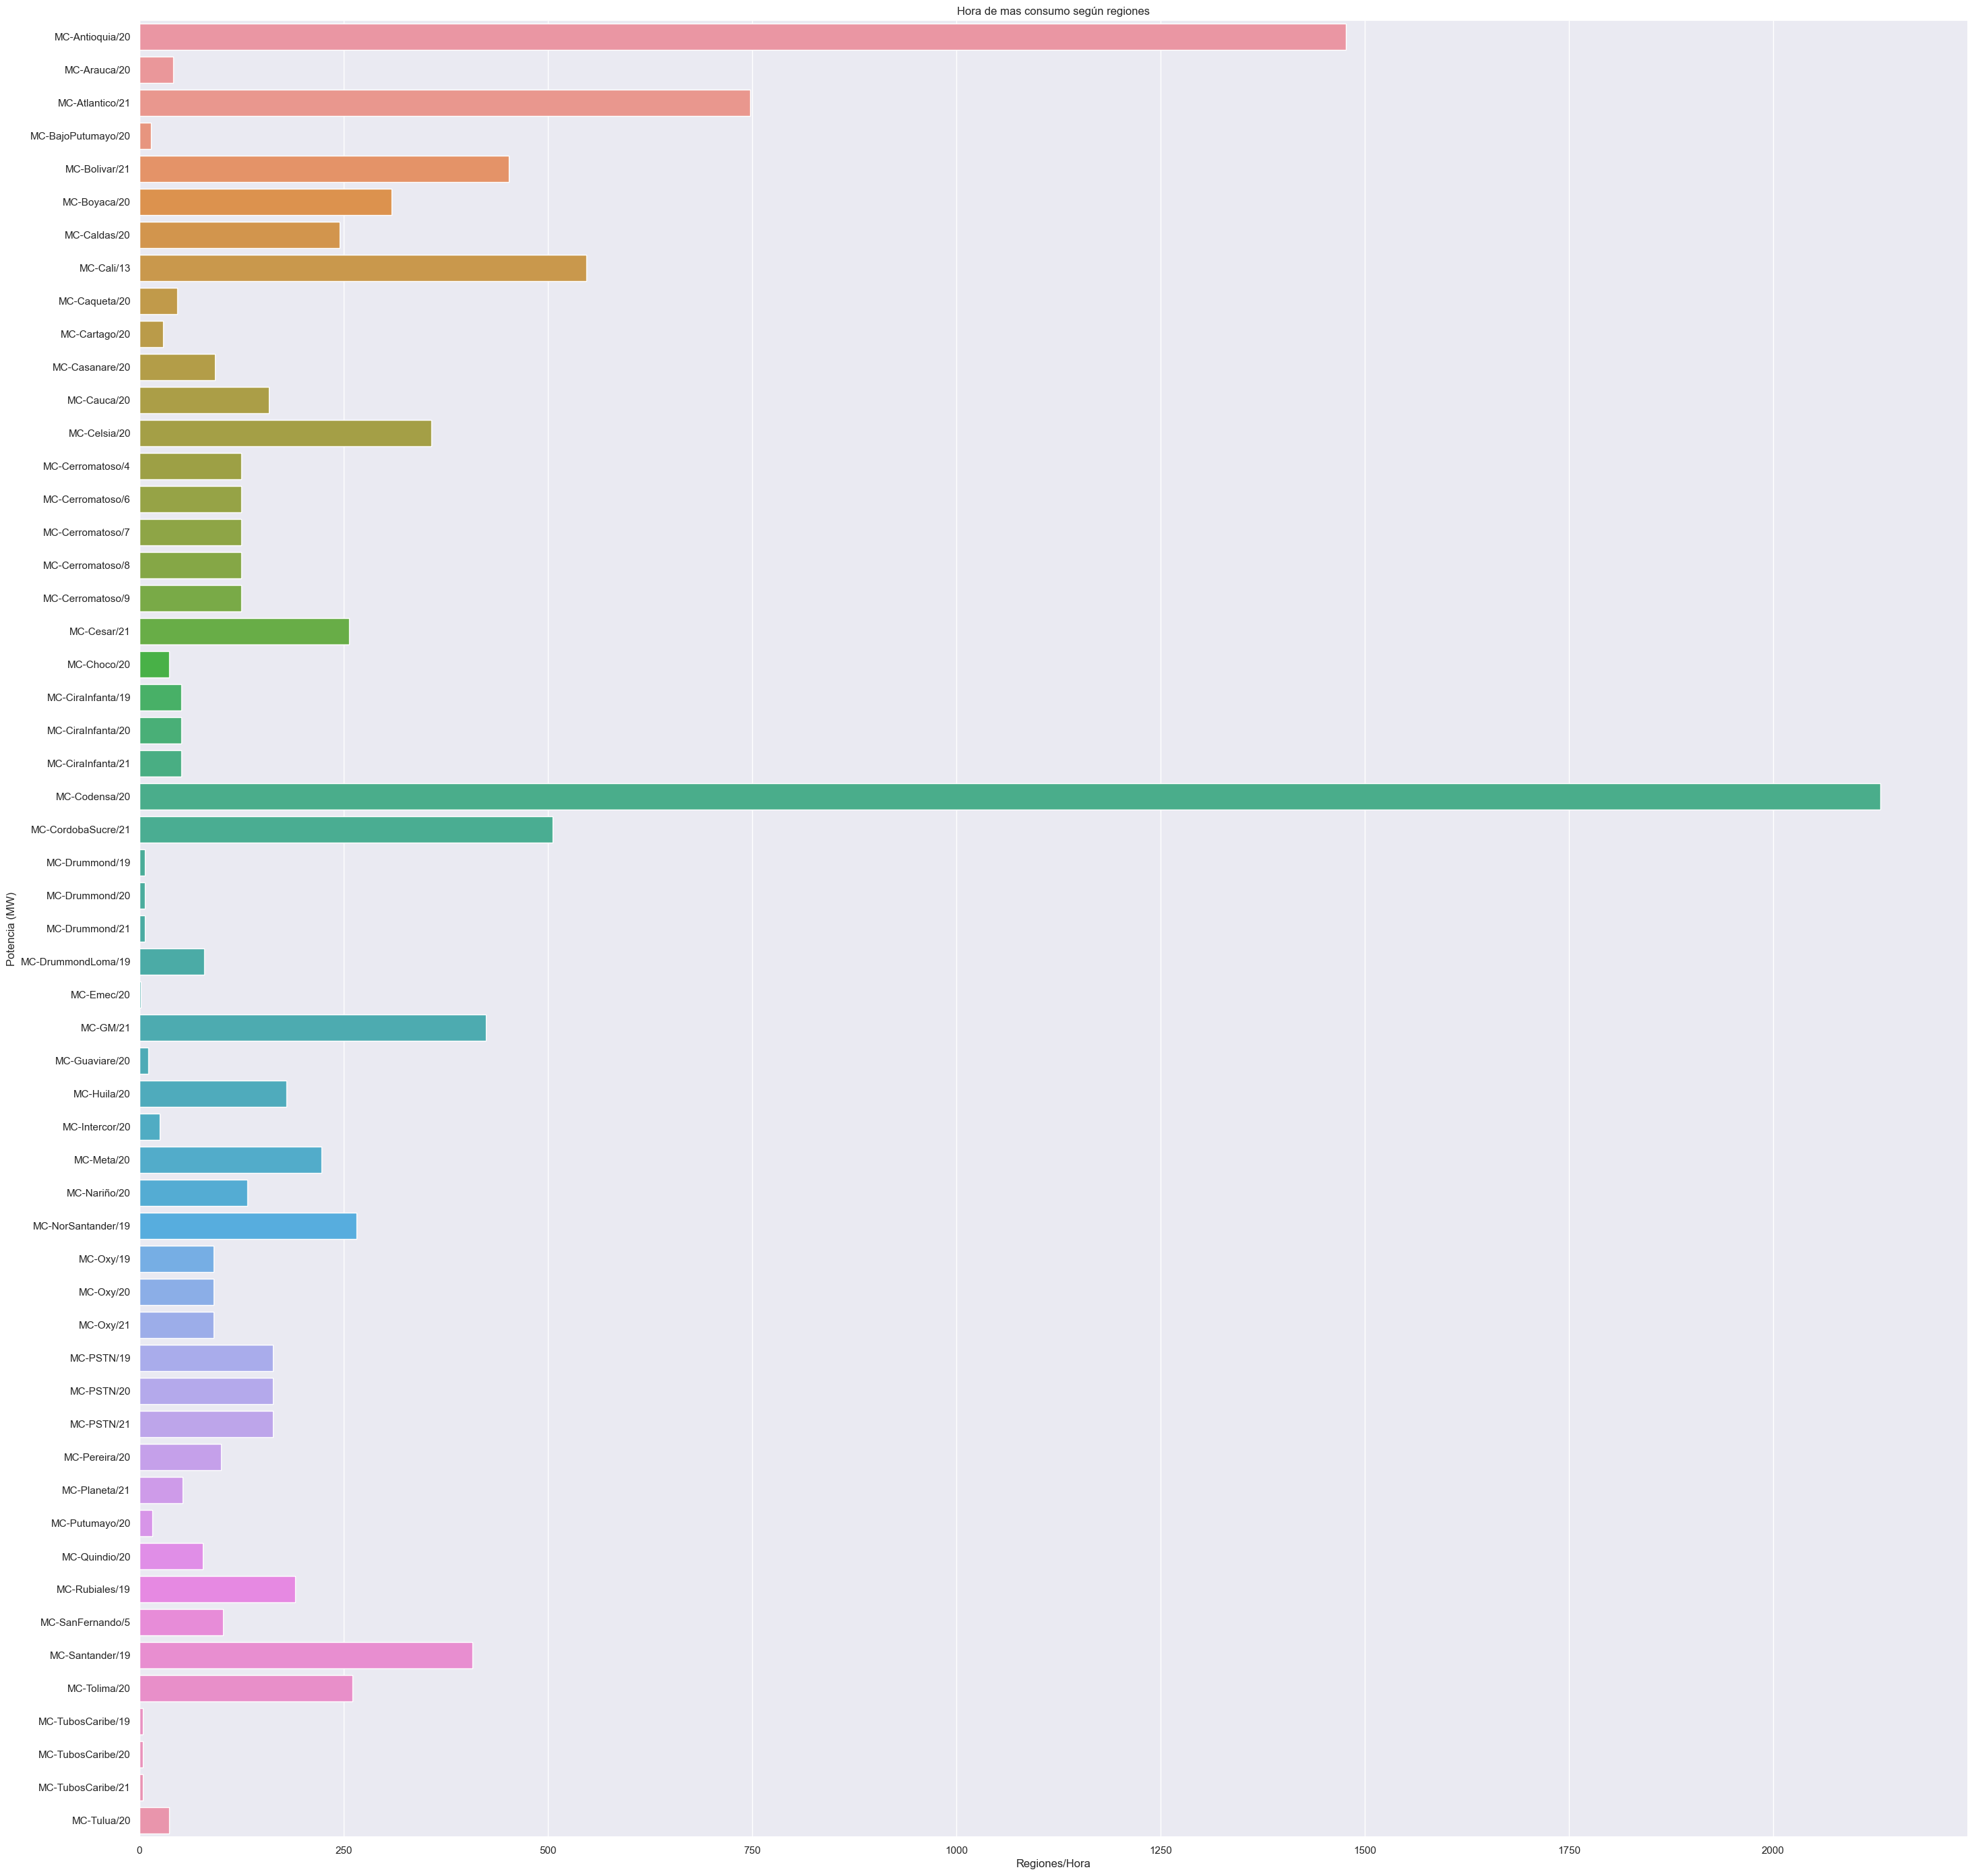

In [10]:
# Grafico general
fig, ax = plt.subplots(figsize=(35,35))
sns.barplot(y="Operador/Hora",x="promedio_semanal_por_dia",data=dataset_max,dodge=False,ax=ax).set(title='Hora de mas consumo según regiones',xlabel='Regiones/Hora',ylabel='Potencia (MW)')

[Text(0.5, 1.0, 'Hora de mas consumo según regiones'),
 Text(0.5, 0, 'Hora'),
 Text(0, 0.5, 'Operadores de red')]

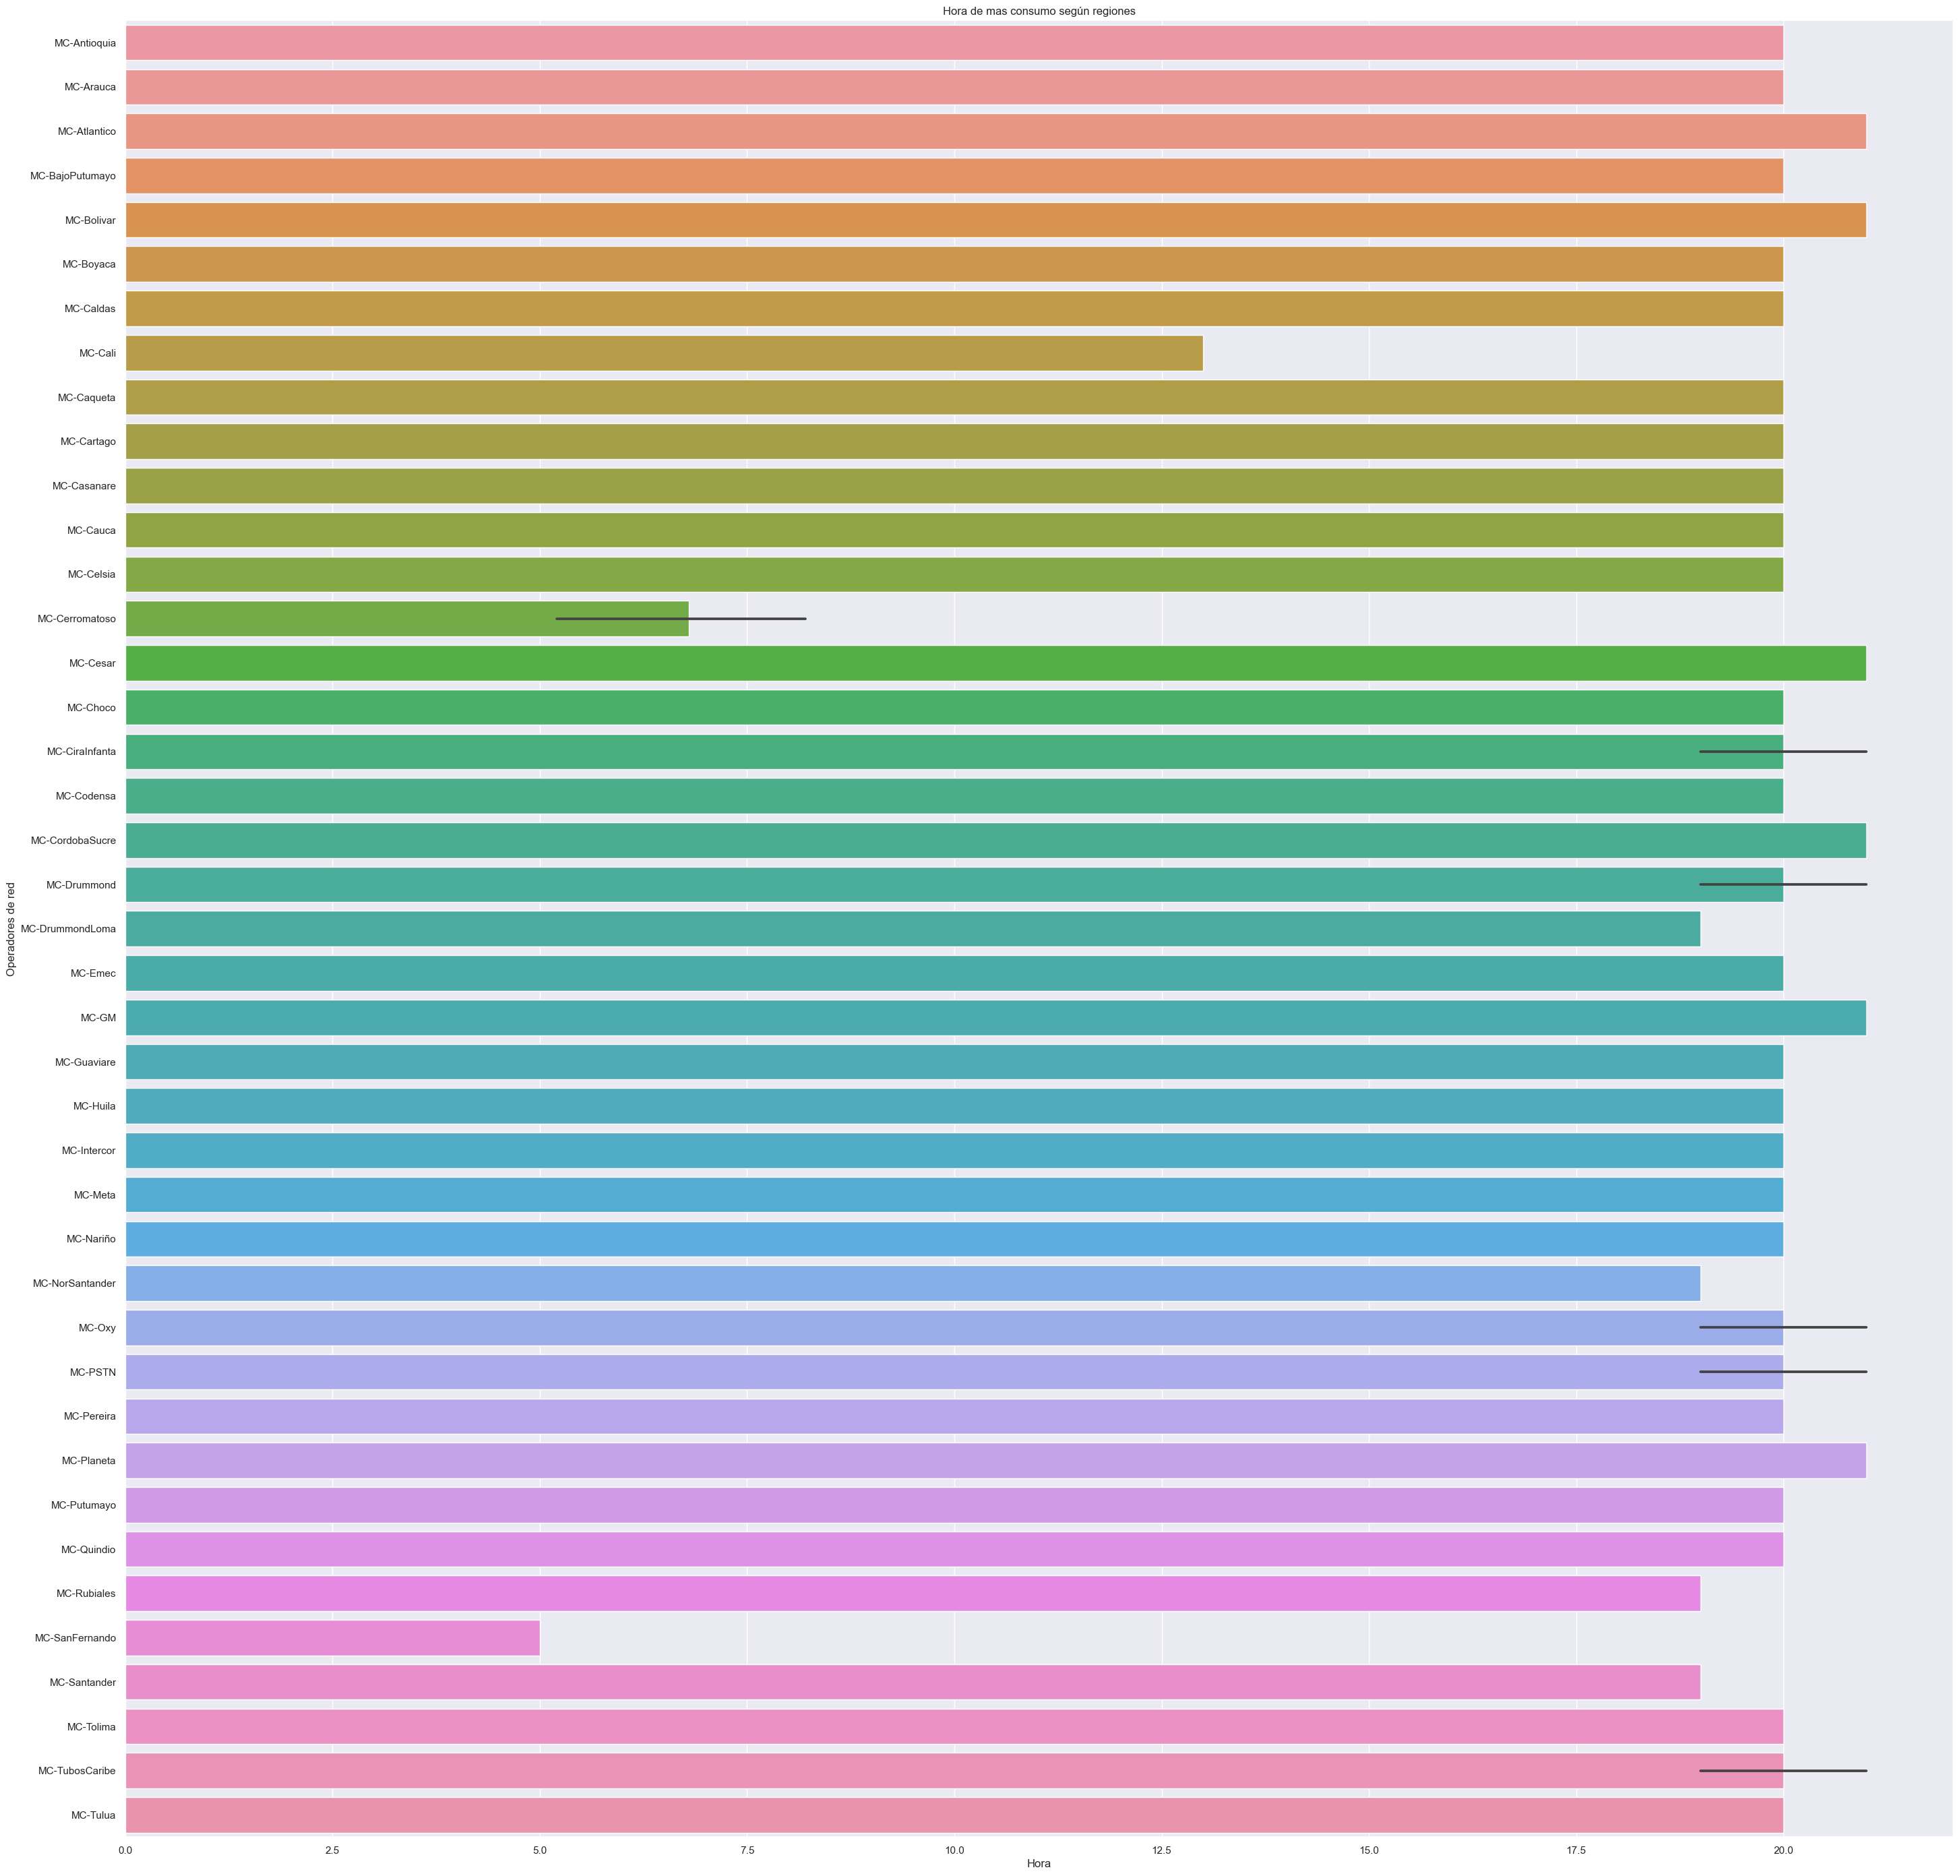

In [11]:
fig2, ax2 = plt.subplots(figsize=(35,35))
sns.barplot(y="Operadores_de_red",x="hora",data=dataset_max,dodge=False,ax=ax2).set(title='Hora de mas consumo según regiones',xlabel='Hora',ylabel='Operadores de red')

In [12]:
# El promedio total es:
from math import trunc
hora_promedio_mas_consumo = dataset_max['hora'].mean()
hora_prom = trunc(hora_promedio_mas_consumo)
minutos_prom = trunc((hora_promedio_mas_consumo-hora_prom)*60)
print(f"Hora promedio de más consumo según dataset: {hora_prom}:{minutos_prom} h")

Hora promedio de más consumo según dataset: 18:26 h


### 18:26 Horas

In [13]:
# Complementando lo anterior se incluira una comparativa para los consumos promedio semanales
# reset index dataset 
dataset_promedio_semanal = dataset.reset_index()
# promedio semanal por día
consumo_semanal = dataset_promedio_semanal[['Operadores_de_red', 'lunes','martes','miercoles','jueves','viernes','sabado','domingo']].groupby('Operadores_de_red').mean()
# promedio semanal total
consumo_semanal['consumo_promedio_semanal'] = consumo_semanal.sum(axis=1)
# reset index para gráficar
consumo_semanal_2 = consumo_semanal.reset_index()
consumo_semanal_2

,Operadores_de_red,lunes,martes,miercoles,jueves,viernes,sabado,domingo,consumo_promedio_semanal
0,MC-Antioquia,1221.495500,1237.340056,1233.500000,1230.833333,1239.180556,1152.194444,1003.123076,8317.666965
1,MC-Arauca,33.196388,35.152444,32.560723,35.411366,36.020322,31.387130,32.890679,236.619051
2,MC-Atlantico,669.784290,676.748833,677.298611,684.211111,683.352778,658.718056,620.343056,4670.456734
3,MC-BajoPutumayo,9.726974,9.786377,9.854946,9.772354,9.876954,10.089183,9.285535,68.392322
4,MC-Bolivar,404.792720,402.330997,409.959827,406.896734,405.944289,395.508970,368.078602,2793.512140
5,MC-Boyaca,258.541552,266.202517,269.816262,274.118966,275.531264,269.064524,244.426062,1857.701146
6,MC-Caldas,204.333333,205.561073,201.305556,207.472222,207.194444,199.888889,181.541667,1407.297184
7,MC-Cali,479.381896,489.580079,488.611116,484.206204,485.202227,451.664925,381.565832,3260.212280
8,MC-Caqueta,37.429828,37.594643,37.453027,36.801943,36.883473,35.481574,33.377347,255.021834
9,MC-Cartago,24.075800,23.957430,23.917986,23.902217,23.592018,22.933624,18.169656,160.548731


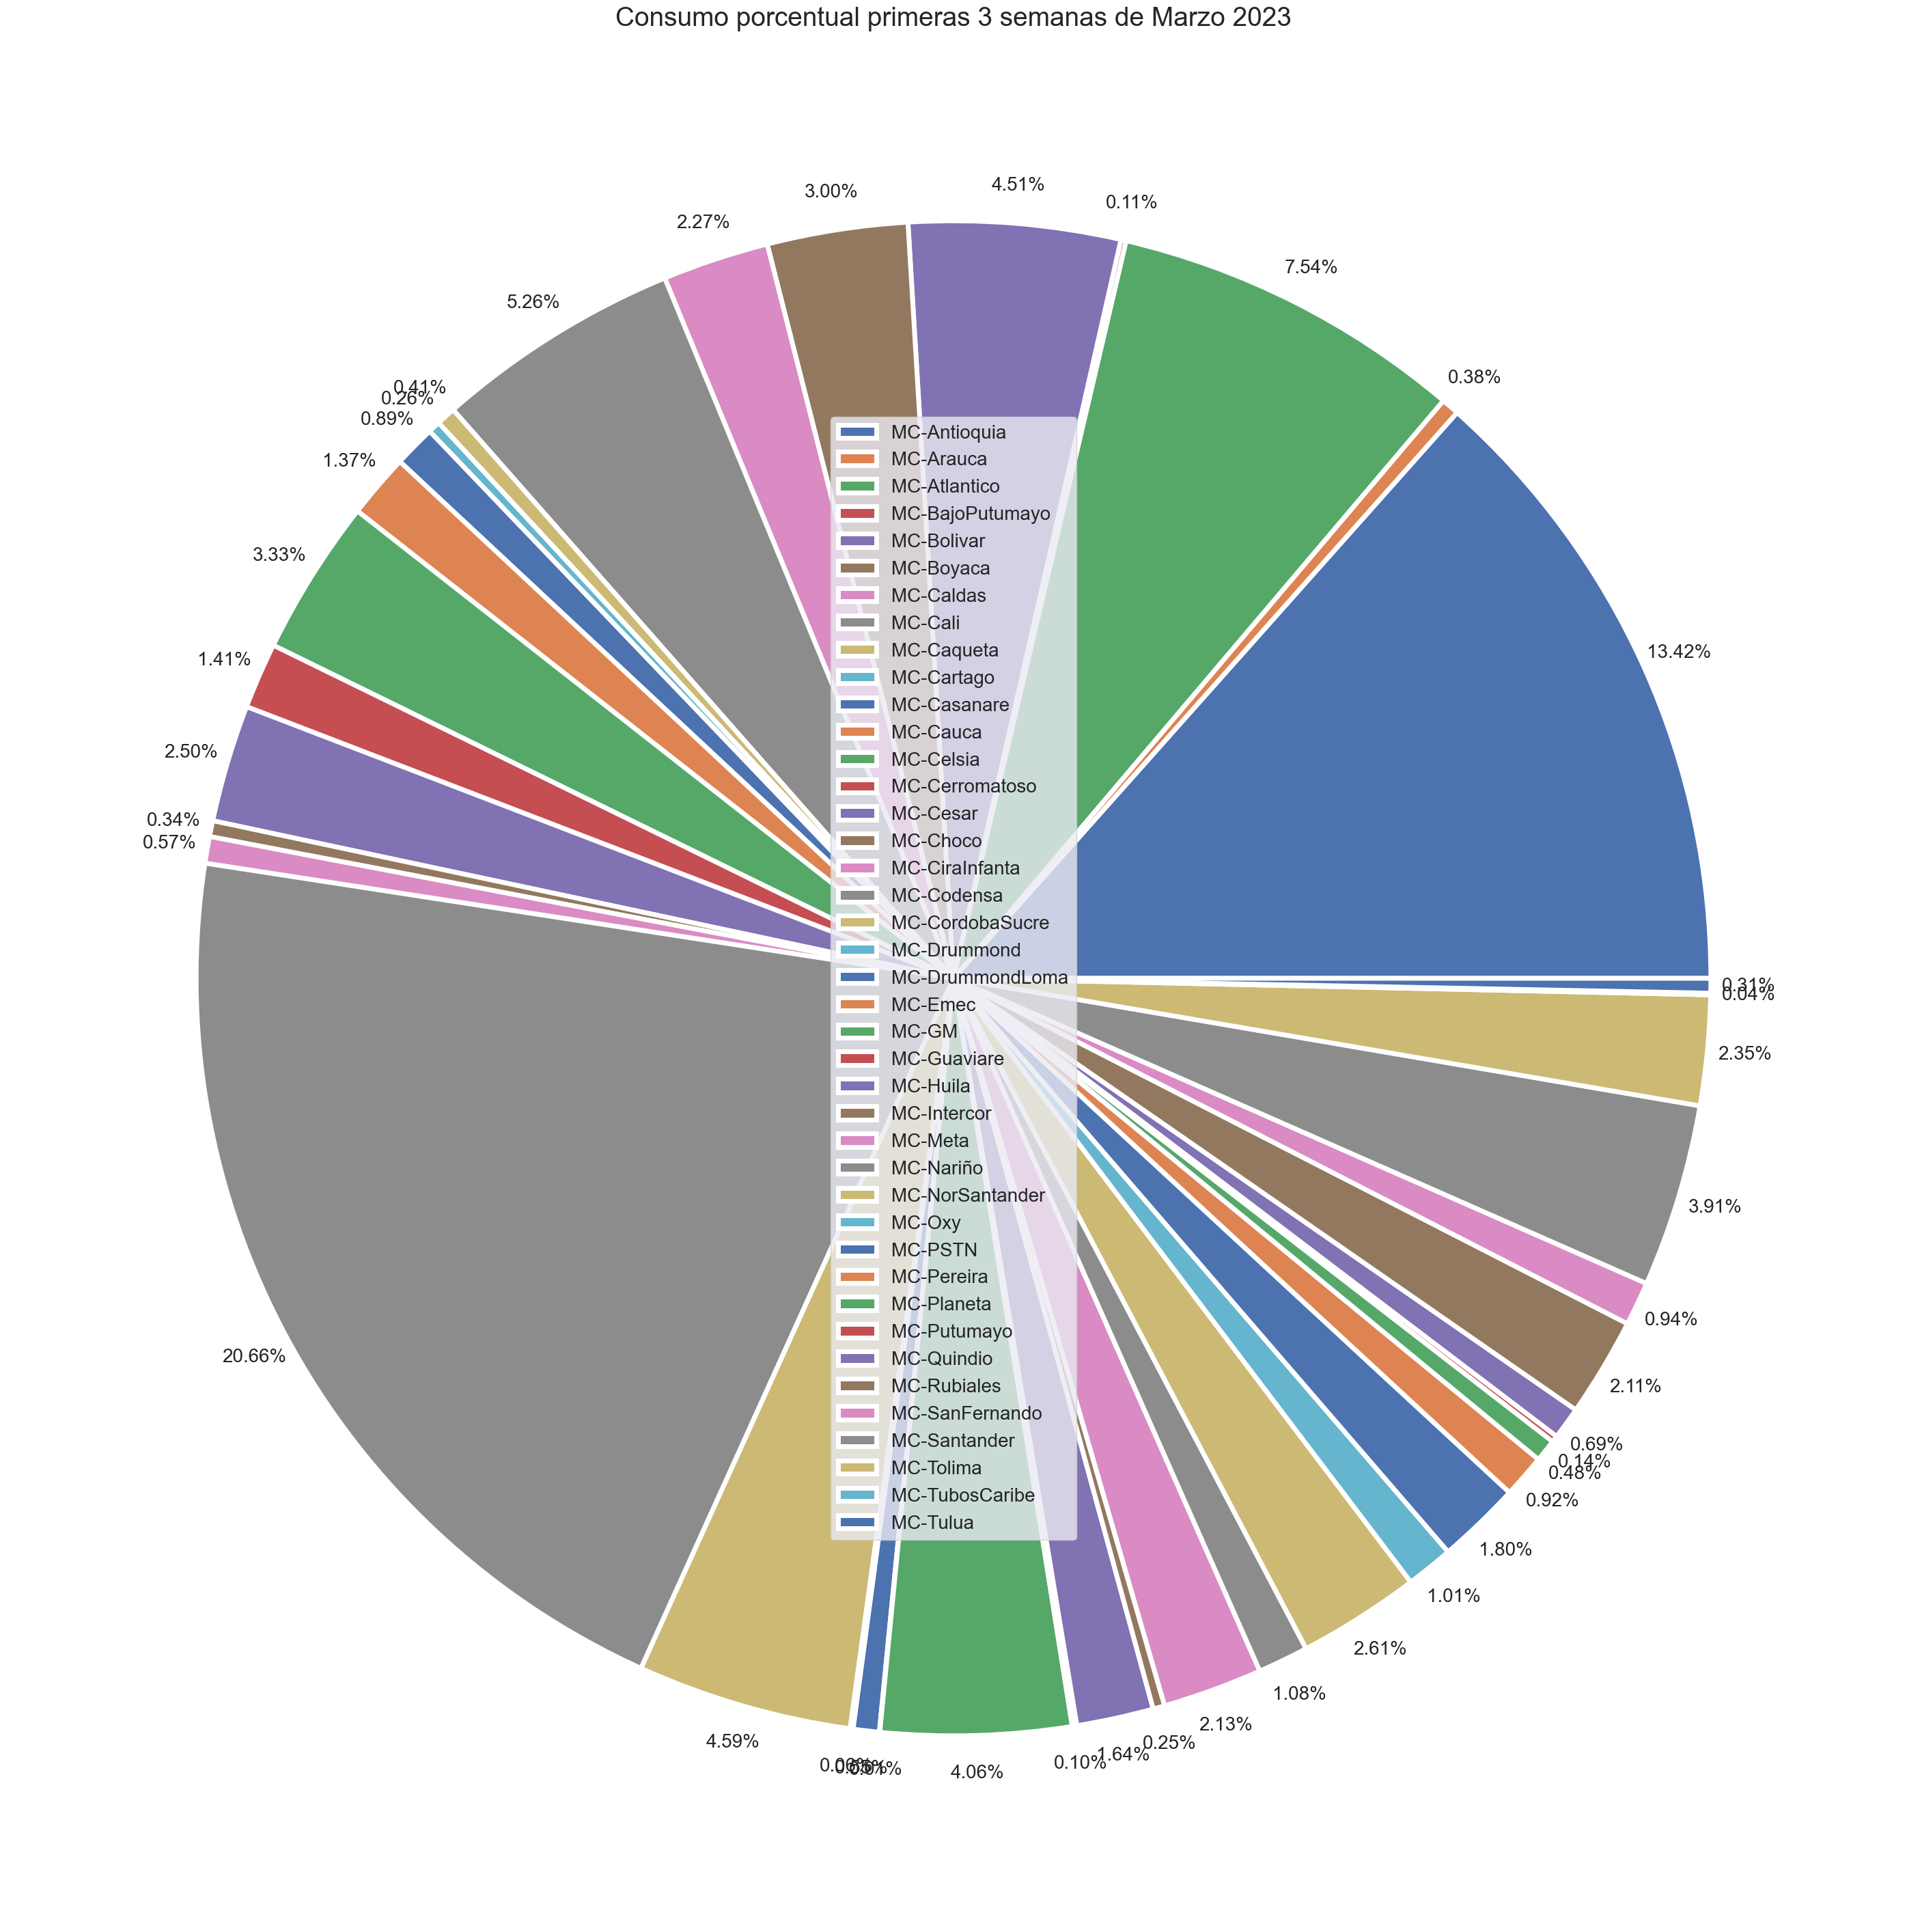

In [14]:
# Graficando en torta
fig4,ax4=plt.subplots(figsize=(40,36))
ax4.set_title('Consumo porcentual primeras 3 semanas de Marzo 2023',fontsize=28)
ax4.pie(consumo_semanal_2['consumo_promedio_semanal'],pctdistance=1.05,textprops={'fontsize':20},autopct='%.2f%%',wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
ax4.legend(consumo_semanal_2['Operadores_de_red'], loc="center",fontsize=20)

#### Observaciones
Se puede evidenciar que los consumos en Codensa representan un 20% de las distribuciones de energía en Colombia en comparacións a las otras operadores, seguido de Antioquia y Atlantico. Las demas no logran ni el 5% sin embargo entre todas ellas superan el 50% de distribución de energía en Colombia

#### ANÁLISIS Y CONCLUSIÓNES **********************************************************************************************
Según los análisis presentados se evidencia que la hora de más consumo en el País durante las primeras semanas se evidencia que la hora de más consumo en promedio son las 18:26, según dicho dato se puede concluir que el horario de la tarde/noche según el grafico de barras anterior es donde las personas tienden a consumir más, esto indica que a pesar de que las industrias tiendan a requerir mas energía que una vivienda familiar, si se tienen muchas viviendas conectandose a dichas horas se presentará un mayor consumo energético. Donde en la mayoria de las regiones se presentan horarios sobre las 20:00, indicando que al necesitar de mayor uso de luces, aparatos de entretenimiento/ trabajo y por el reciente aumento de vida virtual el consumo en horarios nocturnos es mayor que en el transcurso del día para la mayoria de las regiones.
Sin embargo a pesar de que el consumo es mayor en horas nocturnas, revisando el gráfico en ciertas zonas no se presento dicho caso, donde para 3 regiones se presentó en horas de la madrugada, mañana y medio día. Lo cual puede suponerse como falta de recurso energético por ciertos horarios, tienen una zona industrial mucho mas grande que las zonas urbanas o son zonas con grandes zonas rurales donde la forma de vida de las personas no este tan adaptada a la digitalización.

#### *RESPUESTAS A PREGUNTAS*
1 -> **18:26 h**

2 -> **Sector urbano** (Incluyendo al consumo de las personas en transporte, entretenimiento, etc.). Para definirse un sector mas preciso se necesita mas información

3 -> **No**. Sin embargo, se pueden presentar ciertas excepciones las cuales necesitan mayor información para generarse una solución clara.

### RECOMENDACIONES

Se recomienda que las energías renovables entren a generar energía en franjas de la tarde-noche, esto con el fin de disminuir los picos de consumo por parte de las operadores y tambien en franjas del medio día. Esto hará mas prevesible los cambios en la energía tratandose de mantener en una región mas estable.

Se recomienda que las energías renovables efectuen controles avanzados para ajuste de la frecuencia cuando se conecten a la red, generando documentación, etiquetas de seguridad e instalación de control para tener monitoreado en todo momento el consumo y su fase.

Se recomienda incentivar en el eficiencia energética en empresas y zonas residenciales para tratar de usar mejores equipos que manejen de mejor forma la energía utilizada.